In [1]:
# import modules needed for data analysis and get them ready for use in the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from geopy import distance
import math
from sklearn.linear_model import LassoCV
ss = StandardScaler()
lr = LinearRegression()
lscv = LassoCV(max_iter=150000)
raw_data = pd.read_csv("kc_house_data.csv")

In [2]:
drop_raw = raw_data.drop(['id', 'date', 'condition', 
                                      'sqft_above', 'sqft_basement', 'yr_renovated',
                                     'sqft_living15', 'sqft_lot15'], axis=1)
clean_data = drop_raw[drop_raw['bedrooms'] != 33].copy()
clean_data = clean_data.fillna(0)

In [3]:
clean_data['lat_and_long'] = list(zip(clean_data['lat'], clean_data['long']))

In [4]:
finder = clean_data[clean_data['zipcode']==98005]

geopy is y, x

In [5]:
avg_lat_98005 = np.mean(finder['lat'])
avg_long_98005 = np.mean(finder['long'])
(avg_lat_98005, avg_long_98005)

(47.61153154761905, -122.16726785714285)

In [6]:
mid_of_bellevue = (avg_lat_98005, avg_long_98005)
seattle_lat_long = (47.6062, -122.3321)
airport_lat_long = (47.4502, -122.3088)
snoq_falls_lat_long = (47.5417, -121.8377)
vancouver_lat_long = (49.2827, -123.1207)
mt_rain_lat_long = (46.8523, -121.7603)
oly_lat_long = (47.8021, -123.6044)
tacoma_lat_long = (47.2529, -122.4443)
stevens_lat_long = (47.7448, -121.0890)

In [7]:
distances_col = [distance.distance(elem, mid_of_bellevue).miles for elem in clean_data['lat_and_long']]
seattle_distances_col = [distance.distance(elem, seattle_lat_long).miles for elem in clean_data['lat_and_long']]
seatac_distances_col = [distance.distance(elem, airport_lat_long).miles for elem in clean_data['lat_and_long']]
snoq_falls_dist_col = [distance.distance(elem, snoq_falls_lat_long).miles for elem in clean_data['lat_and_long']]
vanc_dist_col = [distance.distance(elem, vancouver_lat_long).miles for elem in clean_data['lat_and_long']]
mt_rain_dist_col = [distance.distance(elem, mt_rain_lat_long).miles for elem in clean_data['lat_and_long']]
oly_dist_col = [distance.distance(elem, oly_lat_long).miles for elem in clean_data['lat_and_long']]
tacoma_dist_col = [distance.distance(elem, tacoma_lat_long).miles for elem in clean_data['lat_and_long']]
stevens_dist_col = [distance.distance(elem, stevens_lat_long).miles for elem in clean_data['lat_and_long']]

In [8]:
clean_data['dist_from_bellevue'] = distances_col
clean_data['dist_from_seattle'] = seattle_distances_col
clean_data['dist_from_seatac'] = seatac_distances_col
clean_data['dist_from_snoq_falls'] = snoq_falls_dist_col
clean_data['dist_from_vancouver'] = vanc_dist_col
clean_data['dist_from_mt_rain'] = mt_rain_dist_col
clean_data['dist_from_oly'] = oly_dist_col
clean_data['dist_from_tacoma'] = tacoma_dist_col
clean_data['dist_from_stevens'] = stevens_dist_col

In [9]:
clean_data['sqft_living'] = np.log(clean_data['sqft_living'])

In [10]:
clean_data['beds_and_baths'] = np.log(clean_data['bedrooms'] * clean_data['bathrooms'])

In [11]:
clean_data['sqft_living_div_floors_div_sqft_lot'] = (clean_data['sqft_living']/clean_data['floors'])/clean_data['sqft_lot']

In [12]:
clean_data['squared_living'] = np.log(np.square(clean_data['sqft_living']))

In [13]:
clean_data['squared_lot'] = np.square(clean_data['sqft_lot'])

In [14]:
clean_data['sqft/bedroom'] = np.log(clean_data['sqft_living']/clean_data['bedrooms'])

In [15]:
clean_data['dist_seatac_seattle'] = (clean_data['dist_from_seatac'] + clean_data['dist_from_seattle'])/2

In [16]:
clean_data['dist_seatac_bellevue'] = (clean_data['dist_from_seatac'] + clean_data['dist_from_bellevue'])/2

In [17]:
clean_data['square_dist_seatac'] = np.square(clean_data['dist_from_seatac'])

In [18]:
clean_data['square_seatac_bellevue'] = np.square(clean_data['dist_seatac_bellevue'])

In [19]:
clean_data['sqft_times_grade'] = np.log(clean_data['sqft_living'] * clean_data['grade'])

In [20]:
clean_data['age'] = 2019 - clean_data['yr_built']

In [21]:
clean_data['sq_age'] = np.square(clean_data['age'])

In [22]:
clean_data['water_weight'] = np.log((1+clean_data['waterfront']) * clean_data['sqft_living'])

In [23]:
clean_data['view_weight'] = np.log((1+clean_data['view']) * clean_data['sqft_living'])

In [24]:
clean_data_dist = clean_data.drop(['lat', 'long', 'lat_and_long'], axis=1).copy()

In [25]:
clean_data_dist.drop('zipcode', axis=1).corr().loc[['price']].T

,price
price,1.000000
bedrooms,0.315961
bathrooms,0.525915
sqft_living,0.611846
sqft_lot,0.089879
floors,0.256820
waterfront,0.264308
view,0.393502
grade,0.667964
yr_built,0.053965


In [26]:
ohe = OneHotEncoder(drop='first', categories='auto') 
price_zip_trans = ohe.fit_transform(clean_data_dist['zipcode'].values.reshape(-1,1))
zip_sparse = pd.DataFrame(price_zip_trans.todense(), columns=ohe.get_feature_names())

In [27]:
clean_data_dist_no_zip = clean_data_dist.drop(['zipcode'], axis=1).copy()

In [28]:
clean_data_dist_no_zip['log_price'] = np.log(clean_data_dist_no_zip['price'])
clean_data_dist_no_zip = clean_data_dist_no_zip.drop(['price', 'waterfront', 'sqft_living_div_floors_div_sqft_lot','squared_lot', 'age', 'sq_age'], axis=1)

In [29]:
model_data = zip_sparse.join(clean_data_dist_no_zip, how='inner')
#model_data.head()

In [30]:
X = model_data.drop('log_price', axis=1)
y = model_data['log_price']
predictors = sm.add_constant(X)
model_stats = sm.OLS(y, predictors).fit()
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1475.
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:40:09   Log-Likelihood:                 4892.9
No. Observations:               21595   AIC:                            -9596.
Df Residuals:                   21500   BIC:                            -8838.
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     18.1623      2.884      6.297      0.000      12.509      23.815
x0_98002                  -0.0360      0.017     -2.096      0.036      -0.070      -0.002
x0_98003                  -0.0073      0.016     -0.470      0.638      -0.038       0.023
x0_98004                   0.1954      0.016     12.201      0.000       0.164       0.227
x0_98005                  -0.1191      0.020     -6.105      0.000      -0.157      -0.081
x0_98006                   0.0112      0.015      0.762      0.446      -0.018       0.040
x0_98007                  -0.1496      0.020     -7.329      0.000      -0.190      -0.110
x0_98008                  -0.1351      0.017     -8.092      0.000      -0.168      -0.102
x0_98010                   0.0635      0.023      2.784      0.005       0.019       0.108
x0_98011                  -0.0402      0.018     -2.214      0.027      -0.076      -0.005
x0_98014                  -0.0825      0.022     -3.773      0.000      -0.125      -0.040
x0_98019                  -0.0121      0.019     -0.636      0.525      -0.050       0.025
x0_98022                  -0.0503      0.020     -2.474      0.013      -0.090      -0.010
x0_98023                  -0.0585      0.014     -4.158      0.000      -0.086      -0.031
x0_98024                  -0.0470      0.025     -1.877      0.061      -0.096       0.002
x0_98027                   0.0134      0.015      0.907      0.364      -0.016       0.042
x0_98028                  -0.0685      0.016     -4.177      0.000      -0.101      -0.036
x0_98029                   0.0194      0.016      1.222      0.222      -0.012       0.050
x0_98030                  -0.0120      0.016     -0.741      0.459      -0.044       0.020
x0_98031                   0.0070      0.016      0.434      0.664      -0.025       0.039
x0_98032                  -0.0545      0.020     -2.660      0.008      -0.095      -0.014
x0_98033                  -0.0046      0.015     -0.310      0.756      -0.033       0.024
x0_98034                  -0.0713      0.014     -5.053      0.000      -0.099      -0.044
x0_98038                  -0.0152      0.014     -1.079      0.281      -0.043       0.012
x0_98039                   0.2872      0.030      9.668      0.000       0.229       0.345
x0_98040                   0.2257      0.017     13.641      0.000       0.193       0.258
x0_98042                  -0.0420      0.014     -3.013      0.003      -0.069      -0.015
x0_98045                  -0.0798      0.019     -4.235      0.000      -0.117      -0.043
x0_98052                  -0.0727      0.014     -5.140      0.000      -0.100      -0.045
x0_98053                   0.0064      0.015      0.426      0.670      -0.023       0.036
x0_98055                  -0.0157      0.017     -0.951      0.342      -0.048  

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                   random_state=10)

In [32]:
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)
lr.fit(X_train_sc, y_train)
lr.score(X_test_sc, y_test)

0.8574789808247854

In [33]:
#list(zip(lr.coef_, X_train.columns))


In [34]:
price_predict = lr.predict(X_test_sc)
y_test_non_log = np.exp(y_test)
price_predict_non_log = np.exp(price_predict)
metrics.mean_squared_error(y_test_non_log, price_predict_non_log)
math.sqrt(metrics.mean_squared_error(y_test_non_log, price_predict_non_log))

138481.20978284648

In [35]:
lscv.fit(X_train_sc, y_train)
lscv.score(X_test_sc, y_test)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.853646351889895

In [36]:
price_predict2 = lscv.predict(X_test_sc)
price_predict2_non_log = np.exp(price_predict2)
math.sqrt(metrics.mean_squared_error(y_test_non_log, price_predict2_non_log))

139895.8862875909

In [37]:
lscv.alpha_

0.00038425863508620965

In [38]:
non_log_prices = np.exp(model_data['log_price'])
non_log_prices

0         221900.0
1         538000.0
2         180000.0
3         604000.0
4         510000.0
5        1230000.0
6         257500.0
7         291850.0
8         229500.0
9         323000.0
10        662500.0
11        468000.0
12        310000.0
13        400000.0
14        530000.0
15        650000.0
16        395000.0
17        485000.0
18        189000.0
19        230000.0
20        385000.0
21       2000000.0
22        285000.0
23        252700.0
24        329000.0
25        233000.0
26        937000.0
27        667000.0
28        438000.0
29        719000.0
           ...    
21566     490000.0
21567     399950.0
21568     380000.0
21569     270000.0
21570     505000.0
21571     385000.0
21572     414500.0
21573     347500.0
21574    1220000.0
21575     572000.0
21576     475000.0
21577    1090000.0
21578     350000.0
21579     520000.0
21580     679950.0
21581    1580000.0
21582     541800.0
21583     810000.0
21584    1540000.0
21585     467000.0
21586     224000.0
21587     50

In [39]:
compiled_data = model_data.copy()
compiled_data['nonlog_prices'] = non_log_prices

In [40]:
colus=ohe.get_feature_names()
to_exclude = list(colus)
to_exclude.append('log_price')
to_exclude.append('nonlog_prices')
#to_exclude

//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


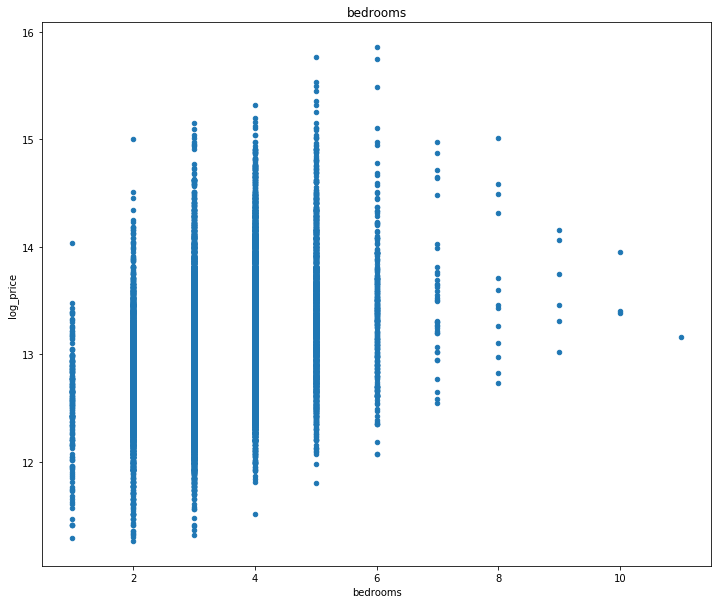

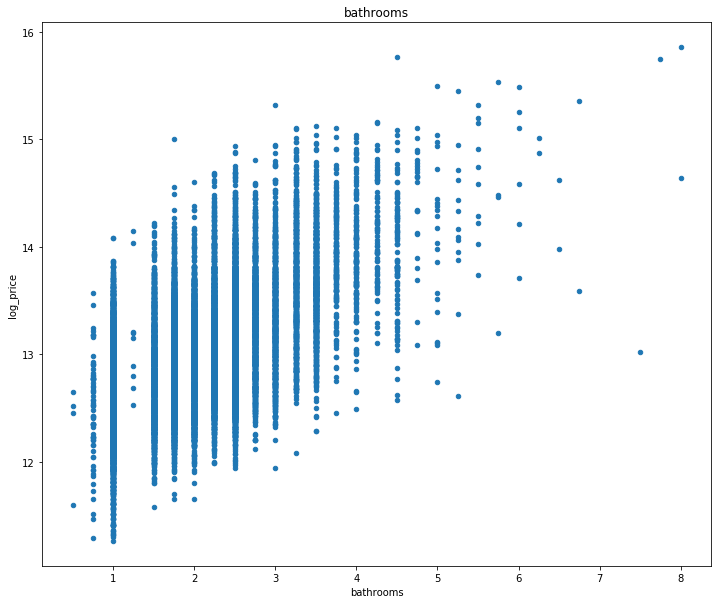

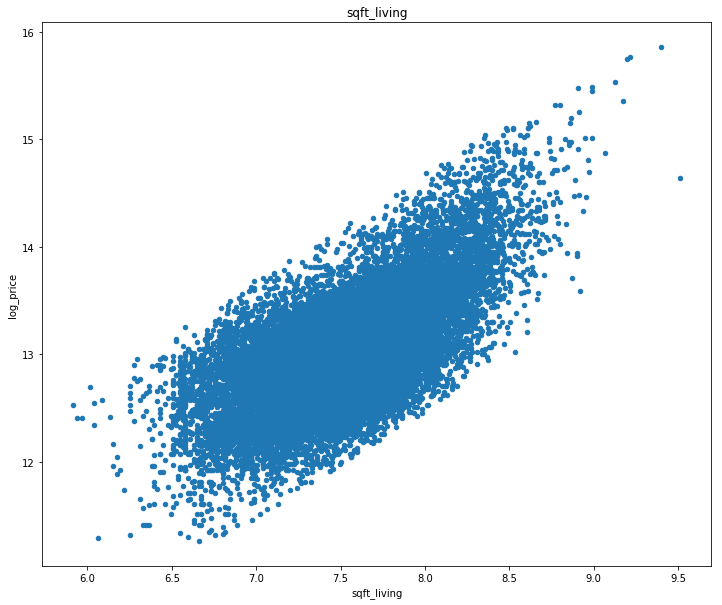

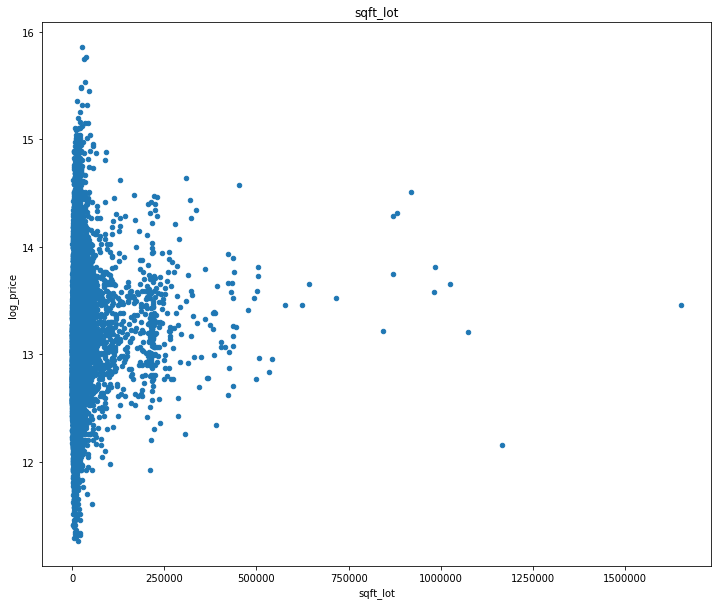

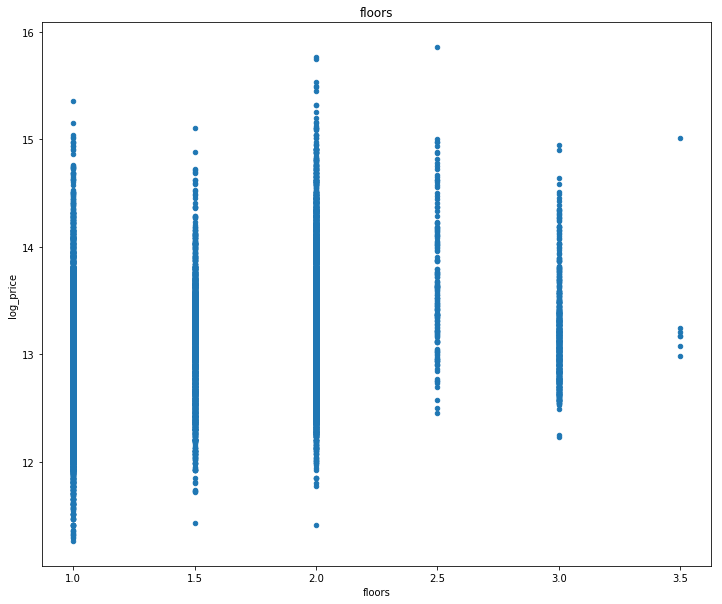

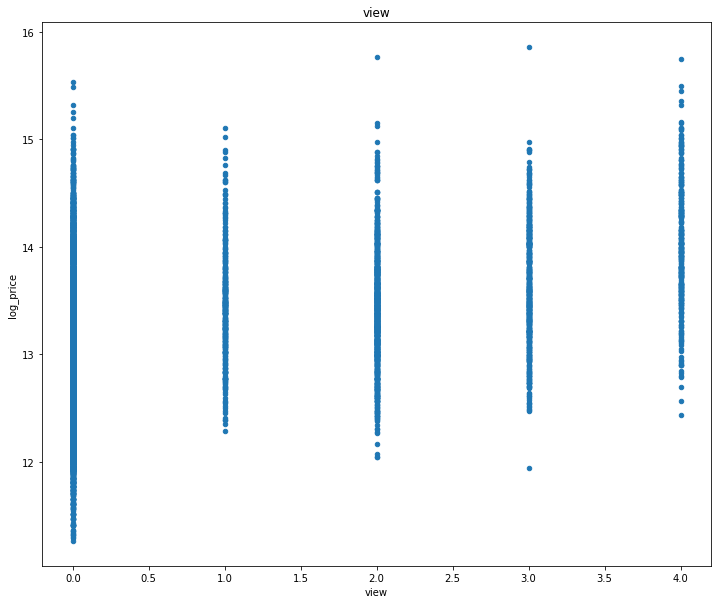

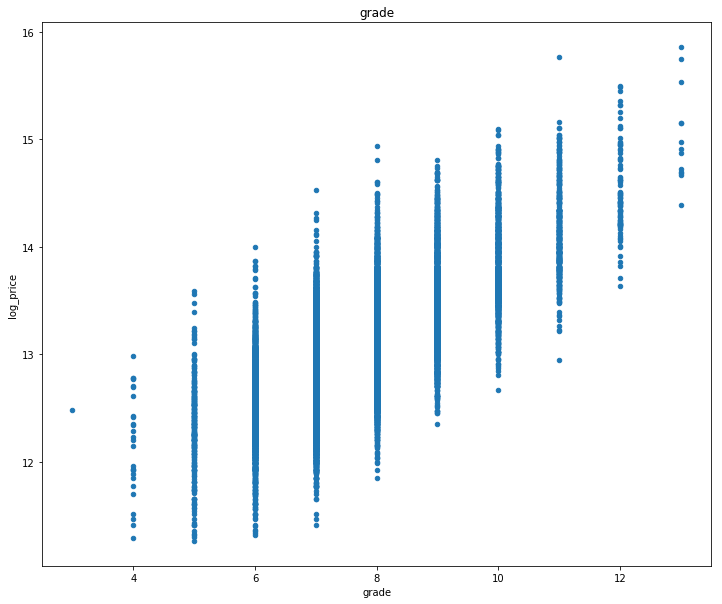

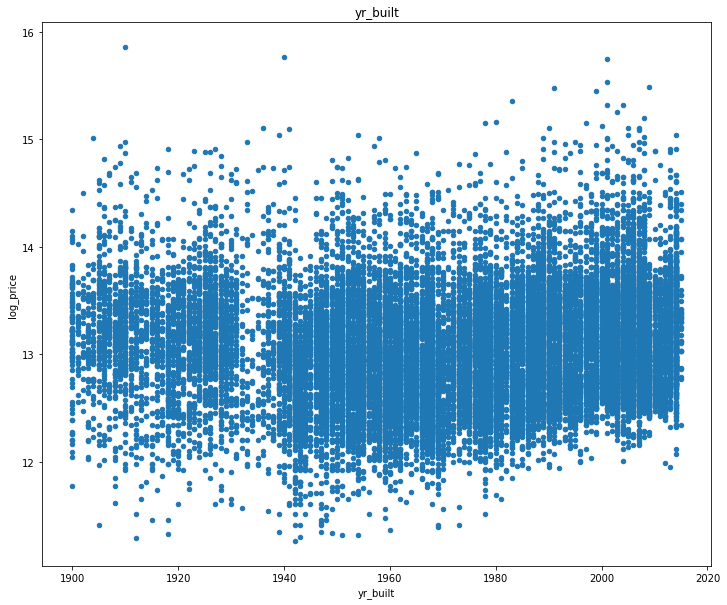

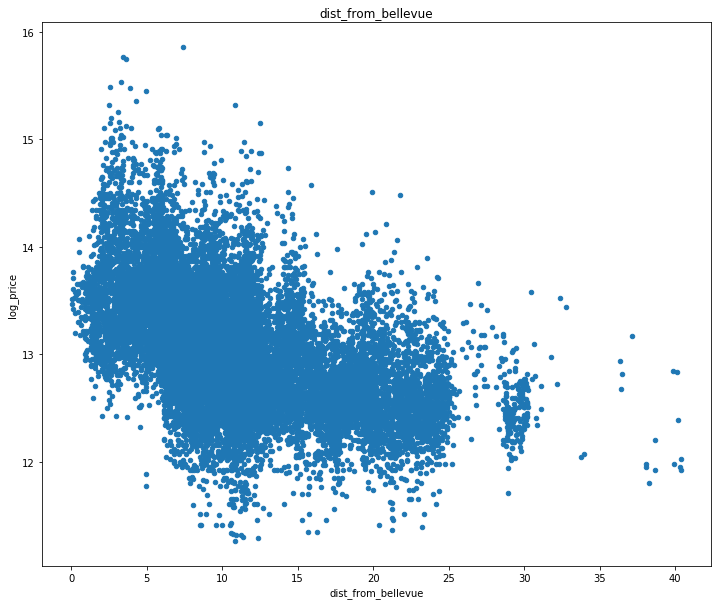

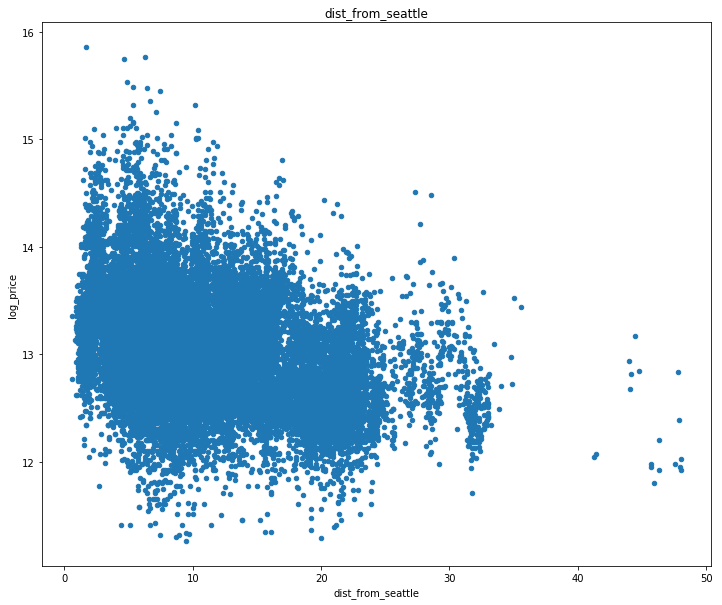

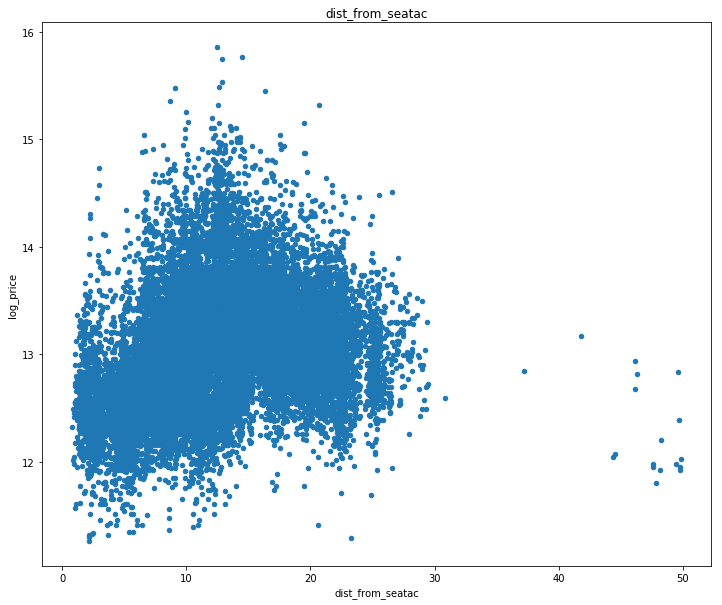

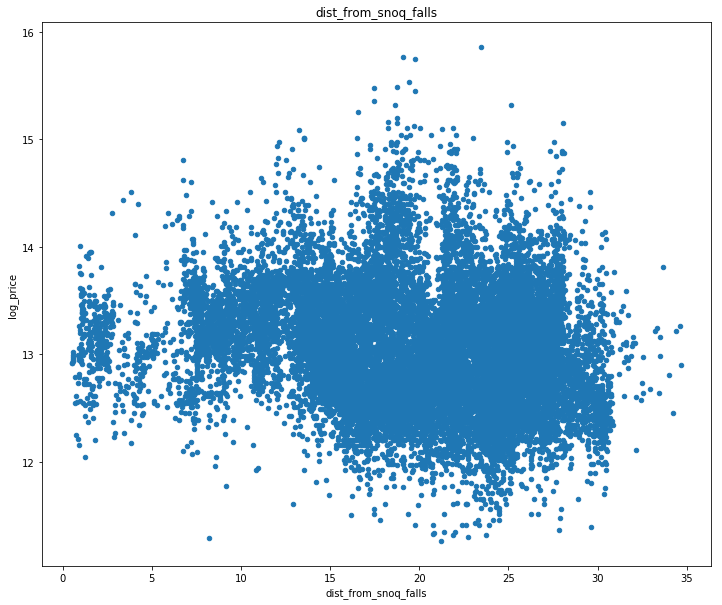

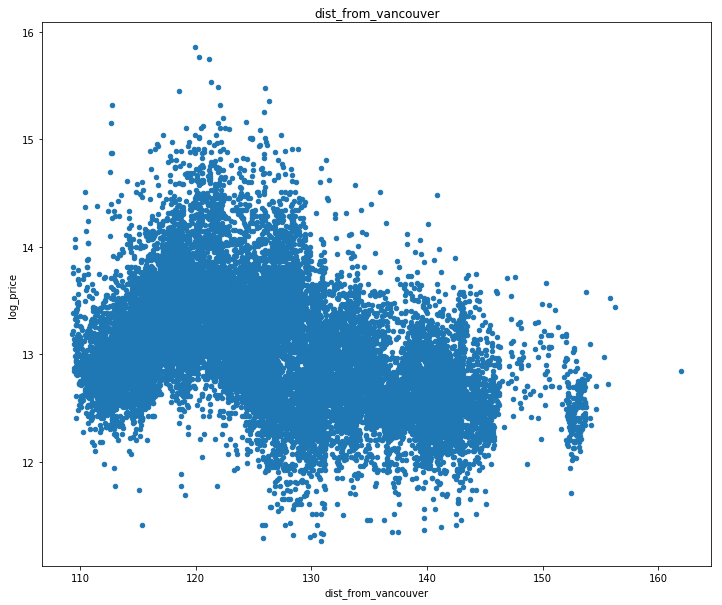

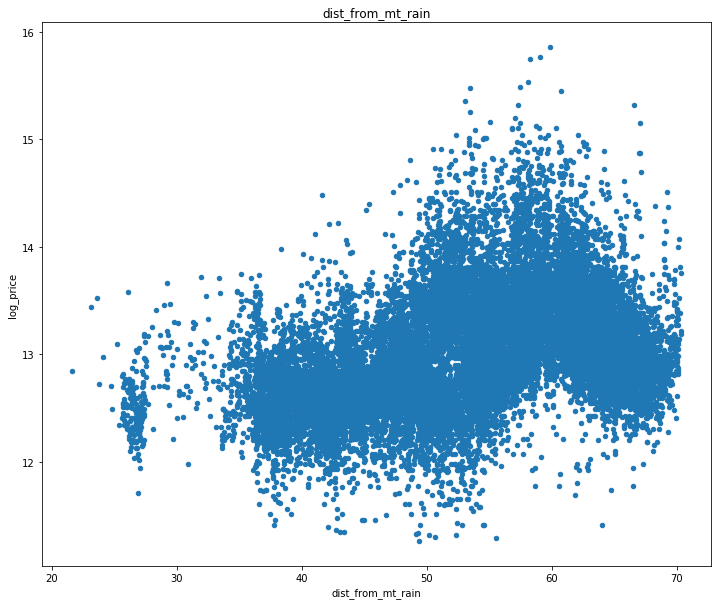

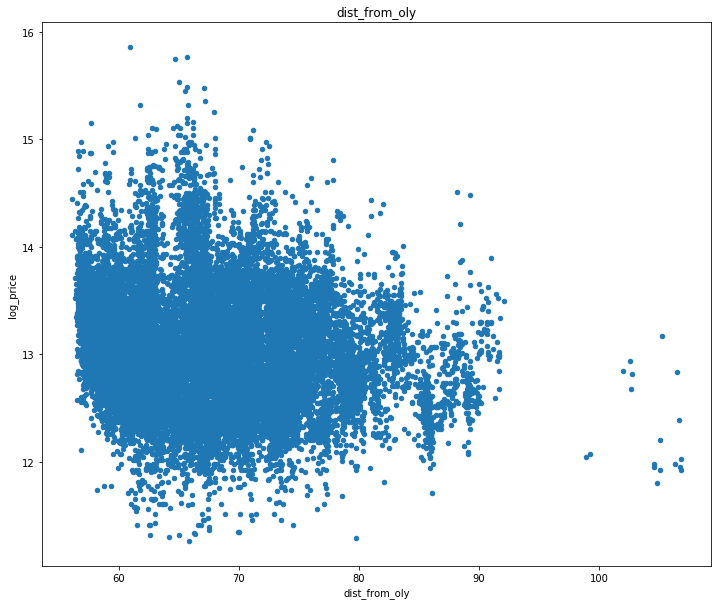

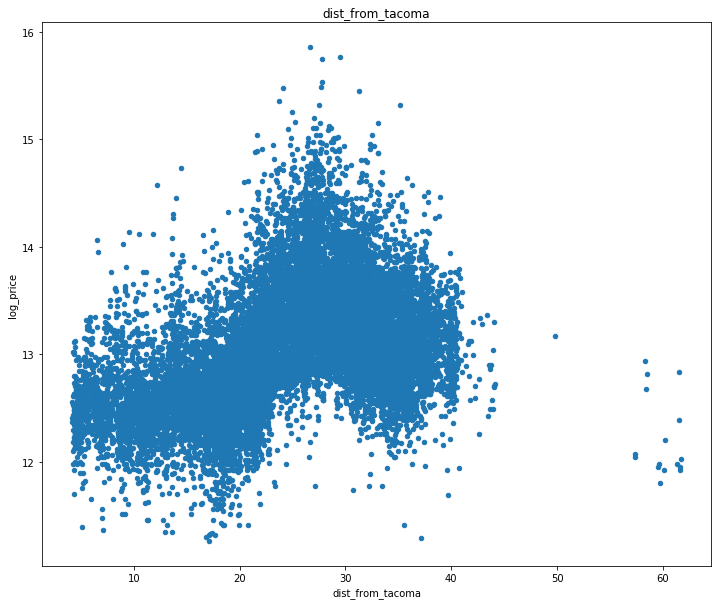

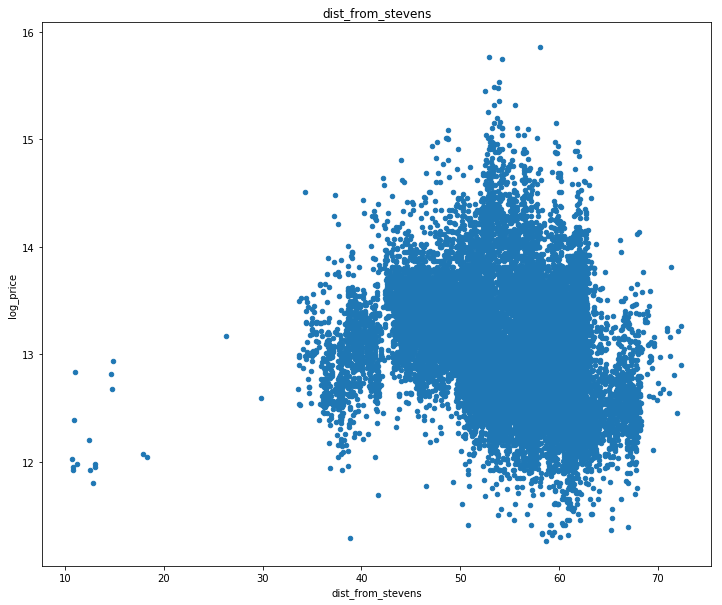

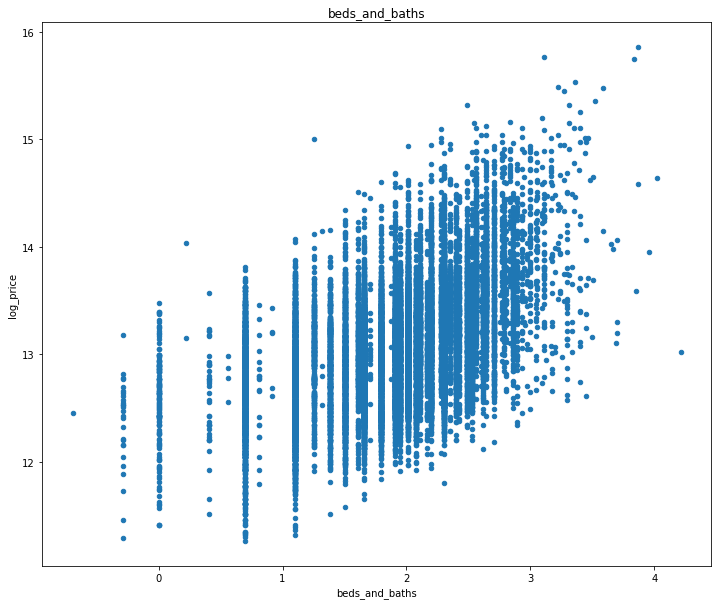

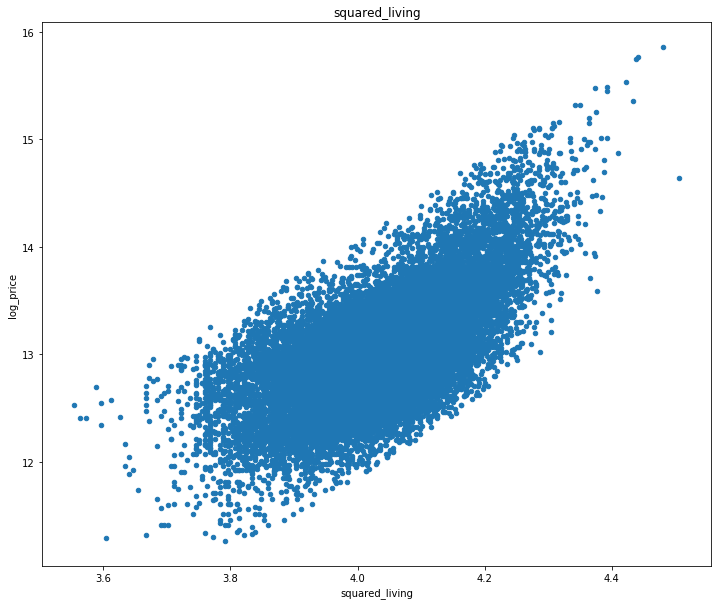

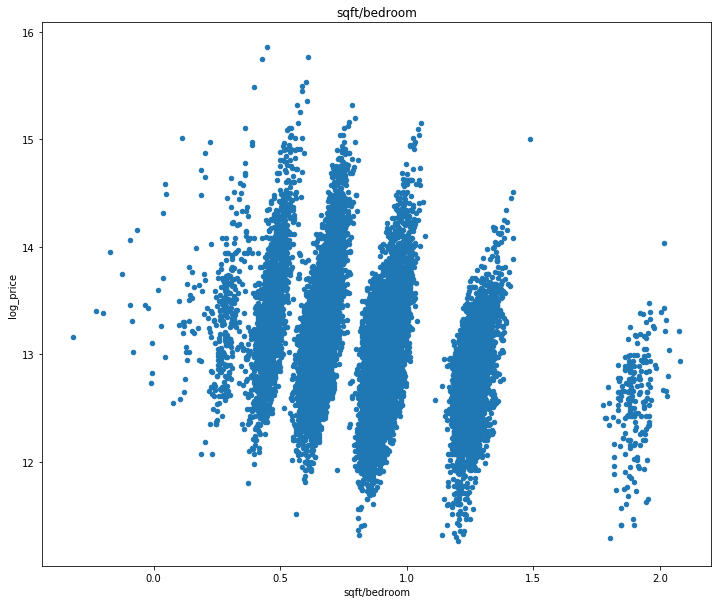

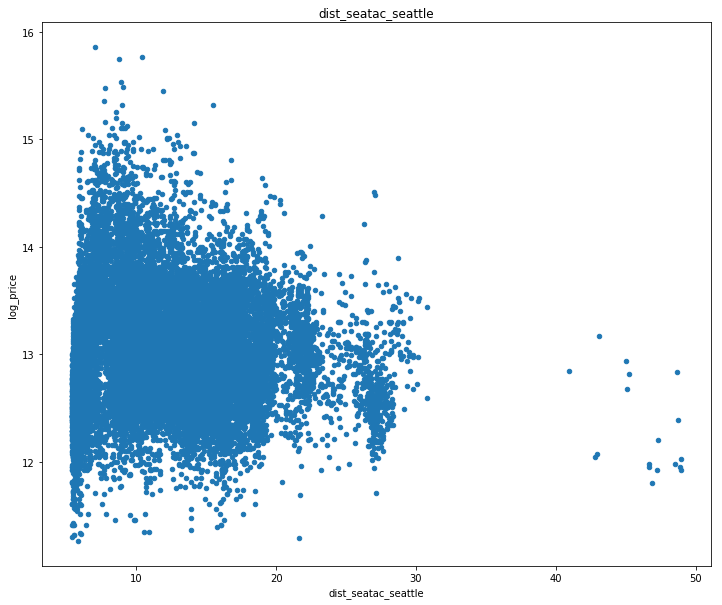

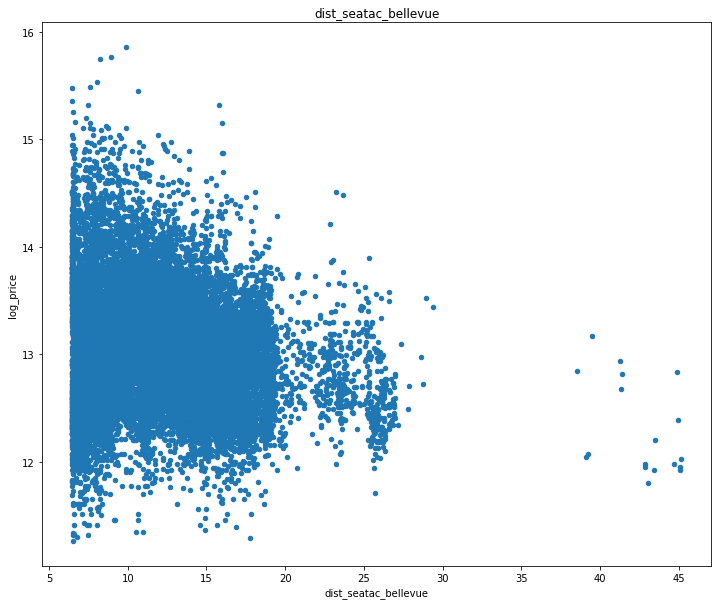

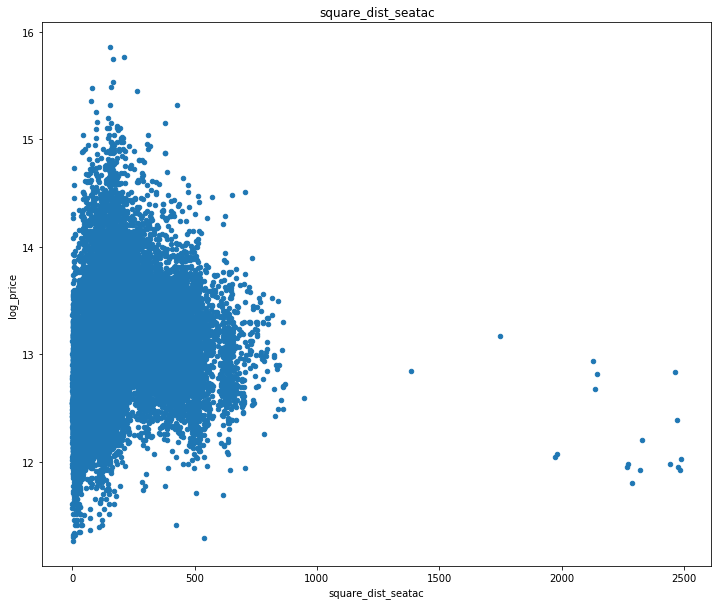

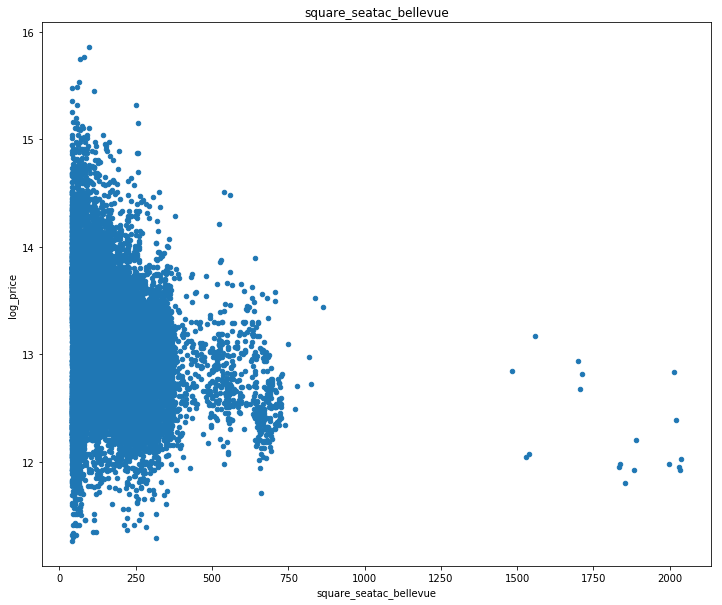

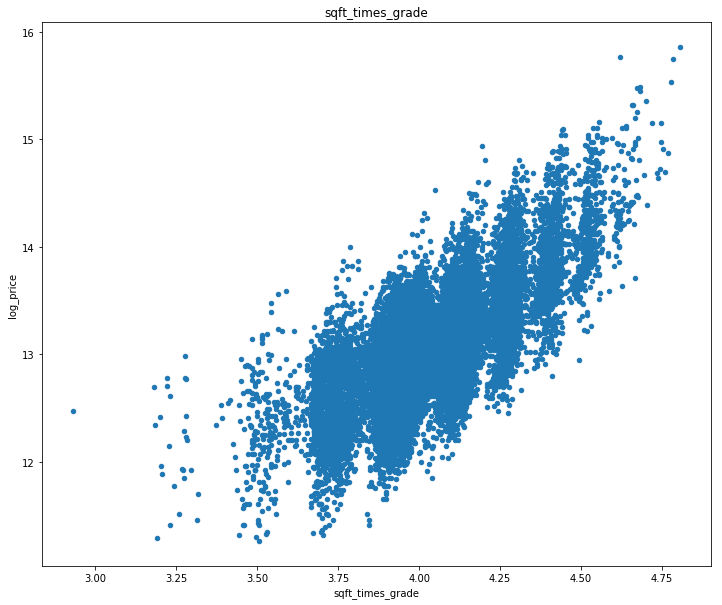

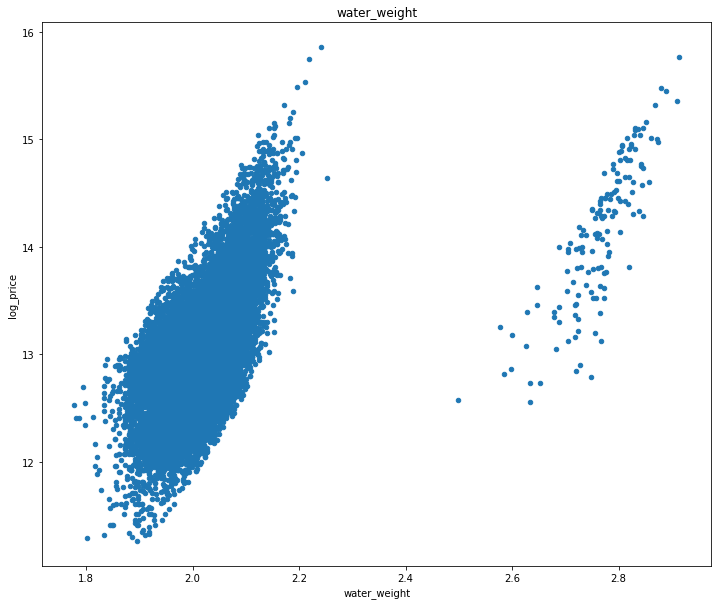

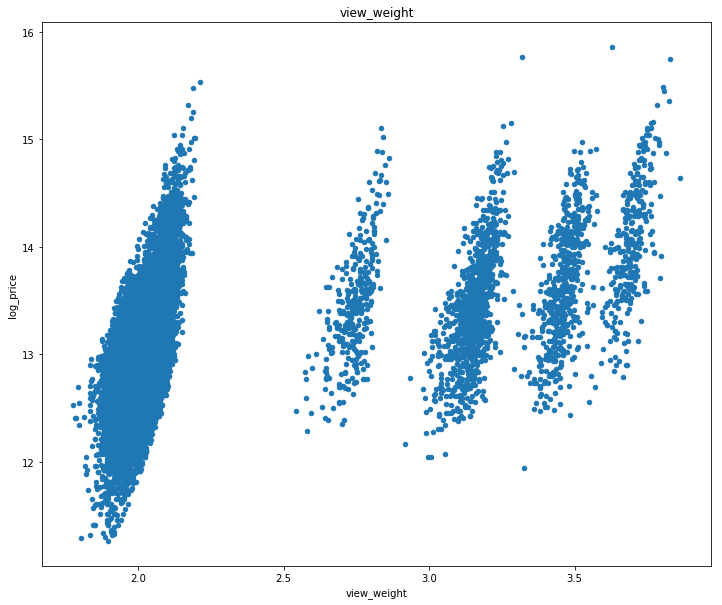

In [41]:
for feature in compiled_data.drop(to_exclude, axis=1).columns:
    compiled_data.plot(x=feature, y='log_price', kind='scatter', title=f"{feature}", figsize=(12,10));

//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


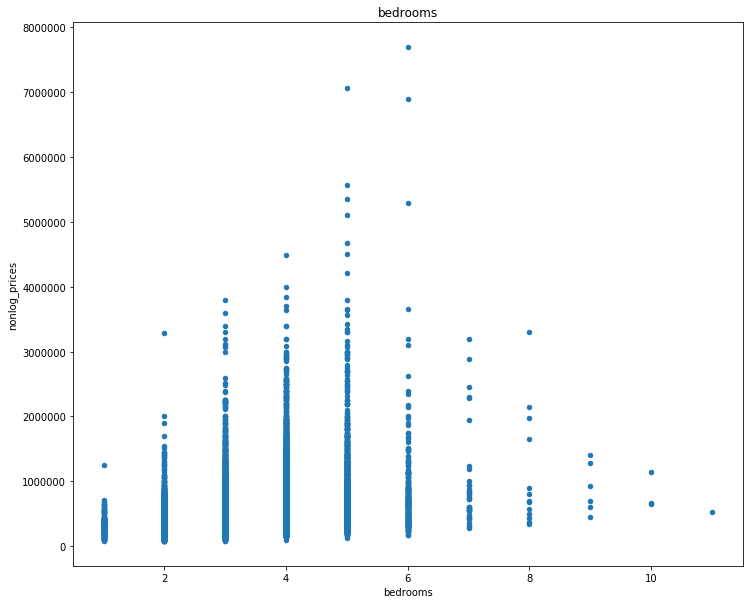

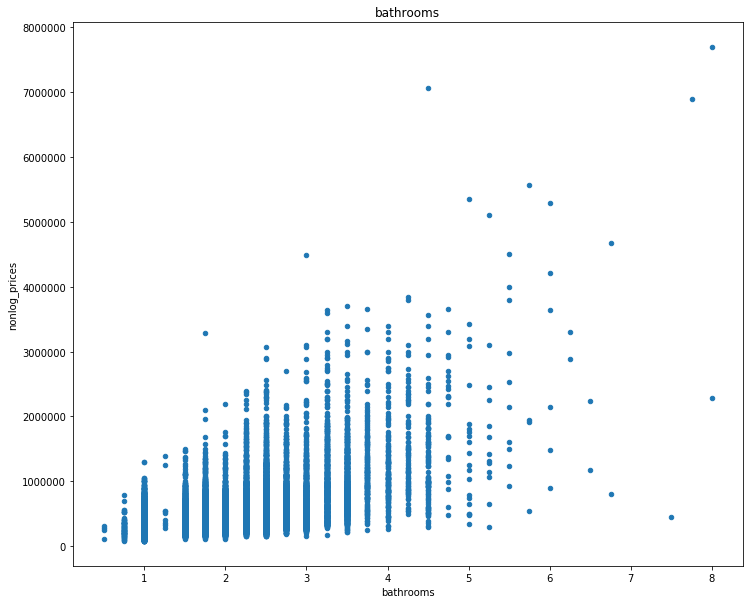

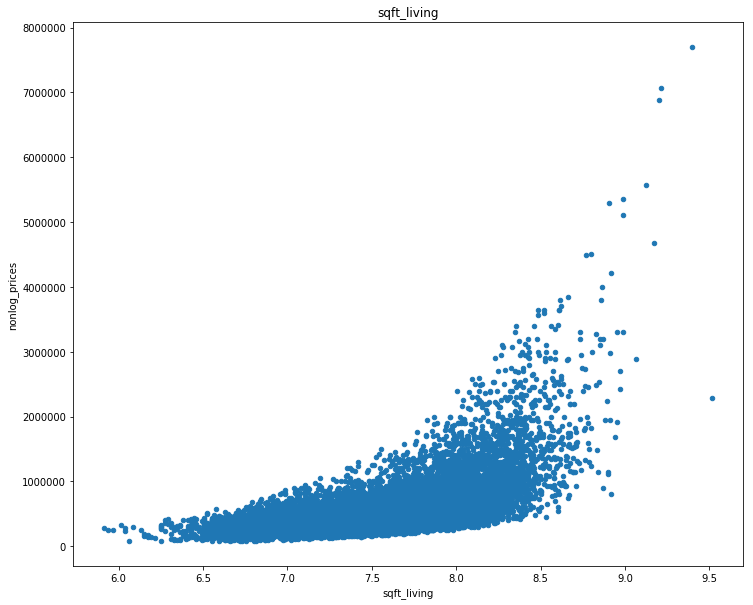

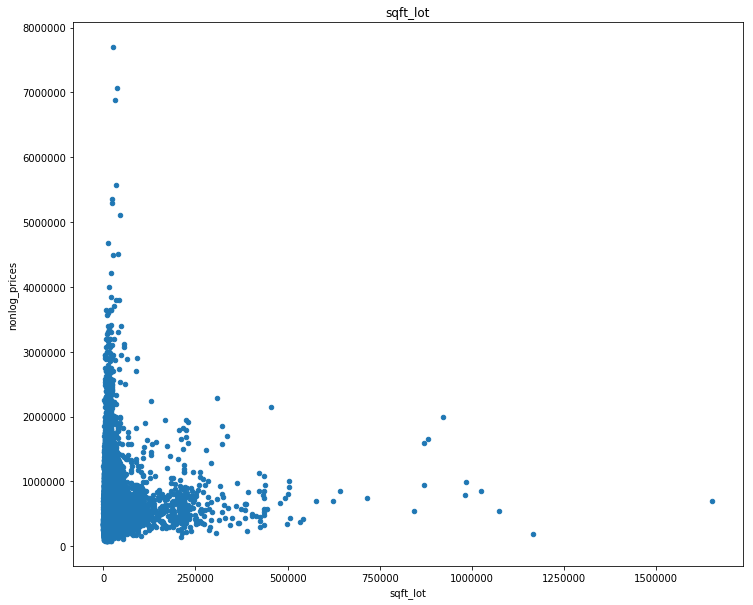

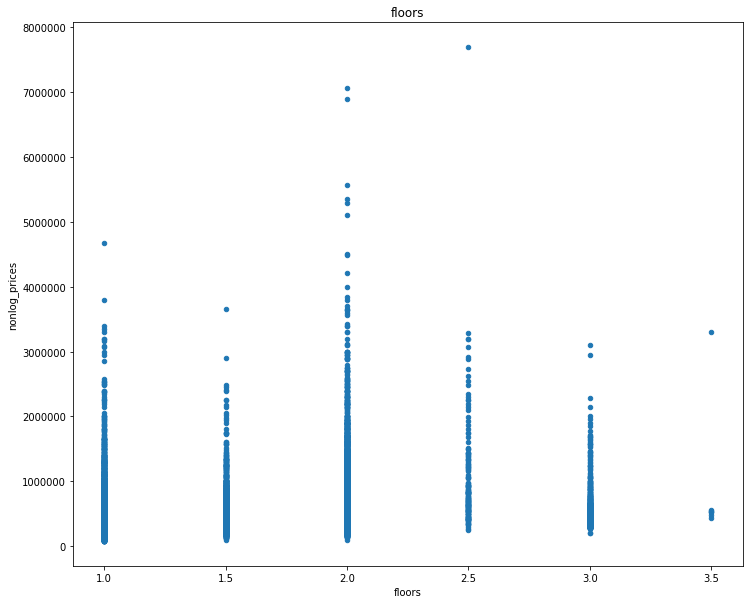

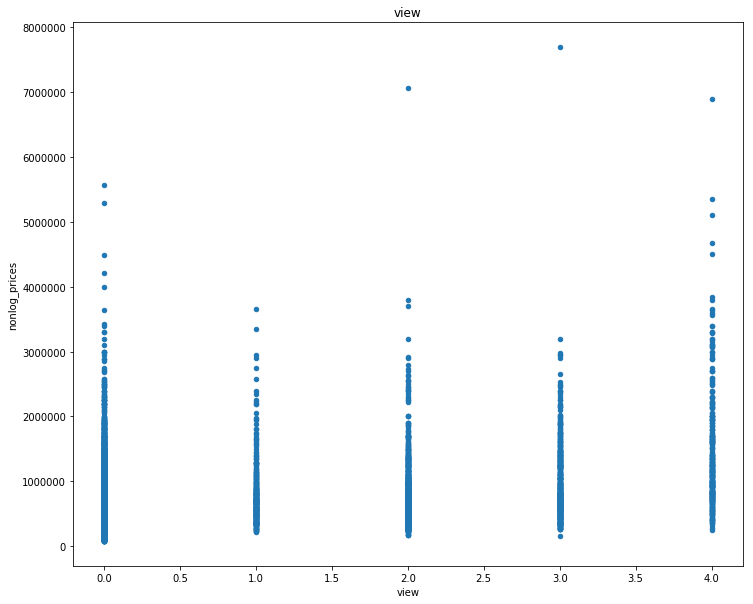

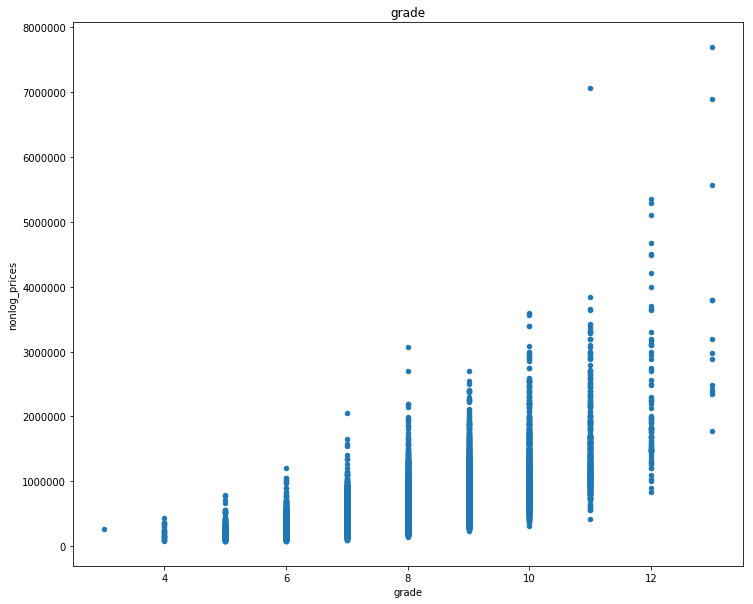

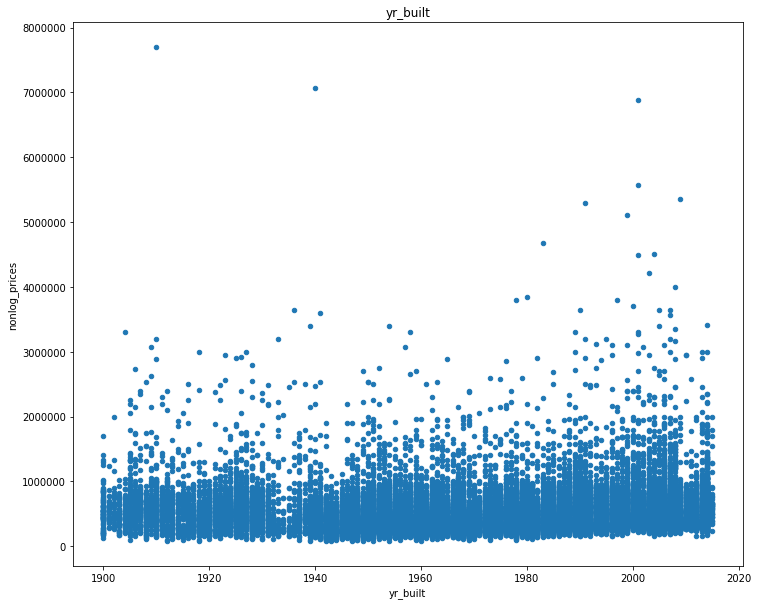

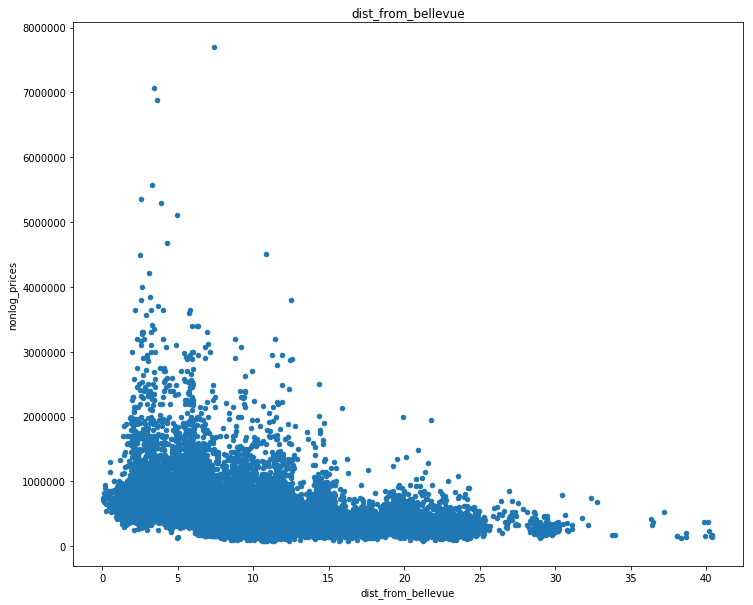

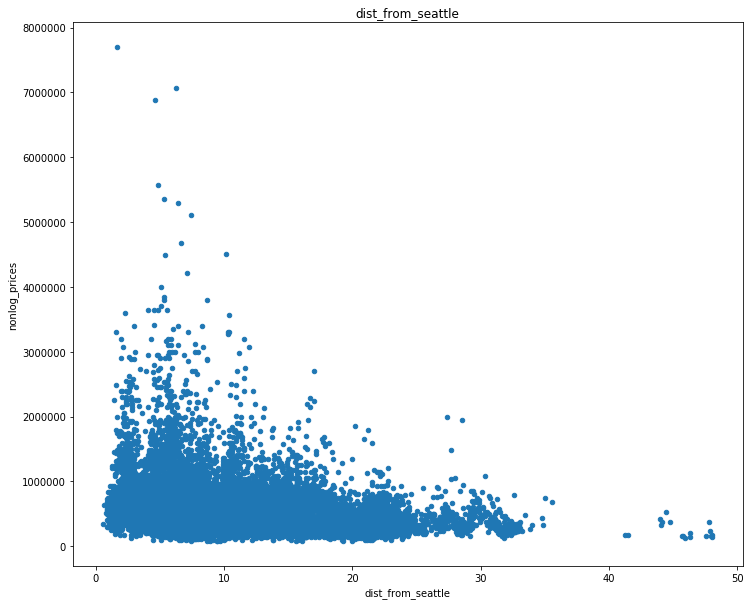

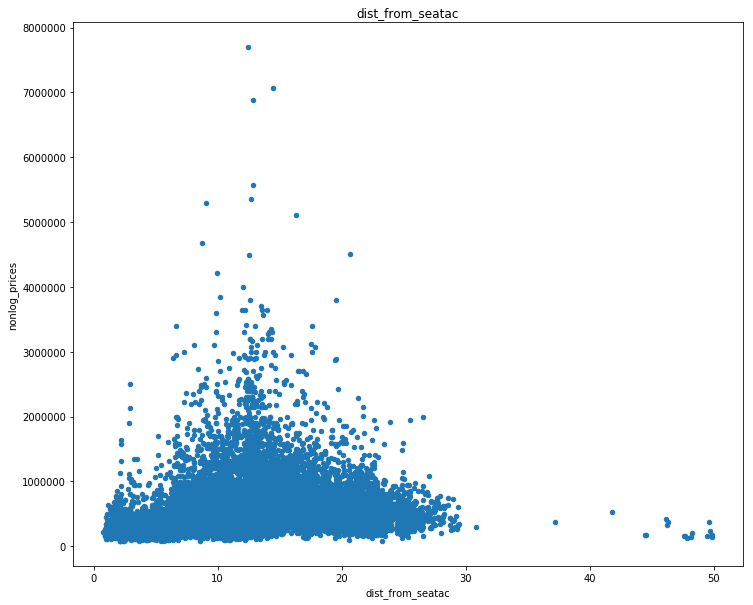

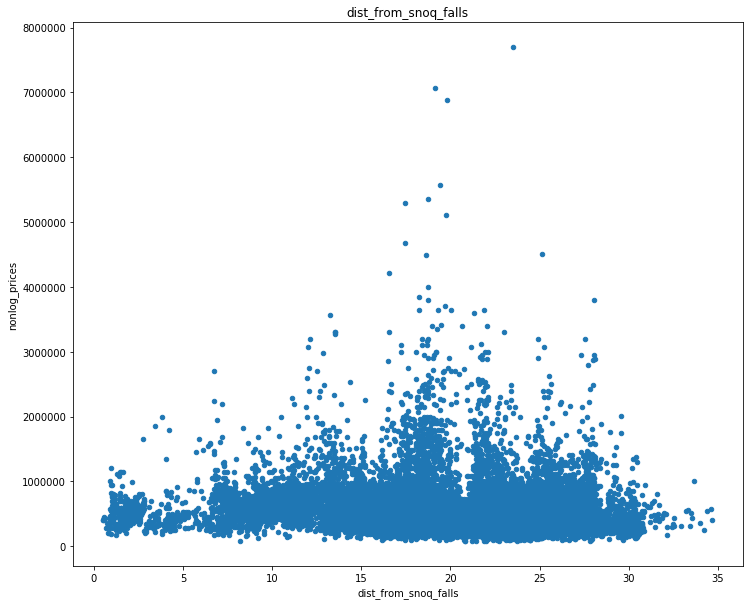

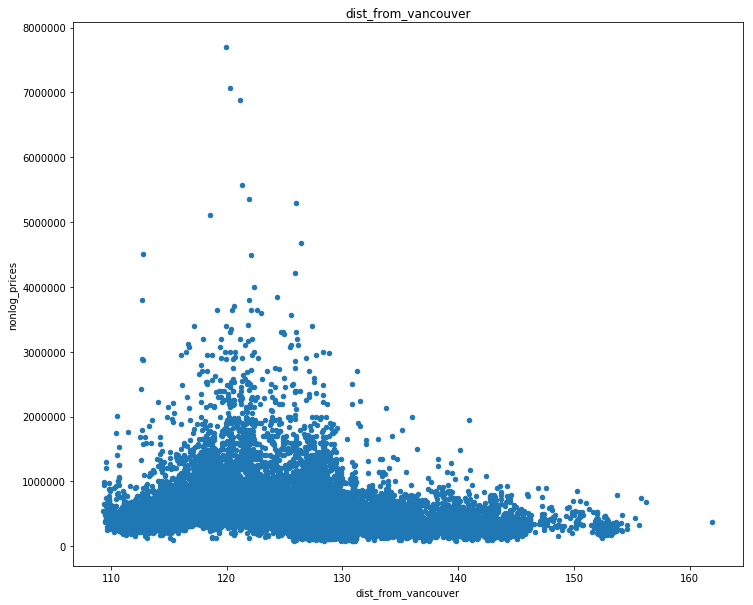

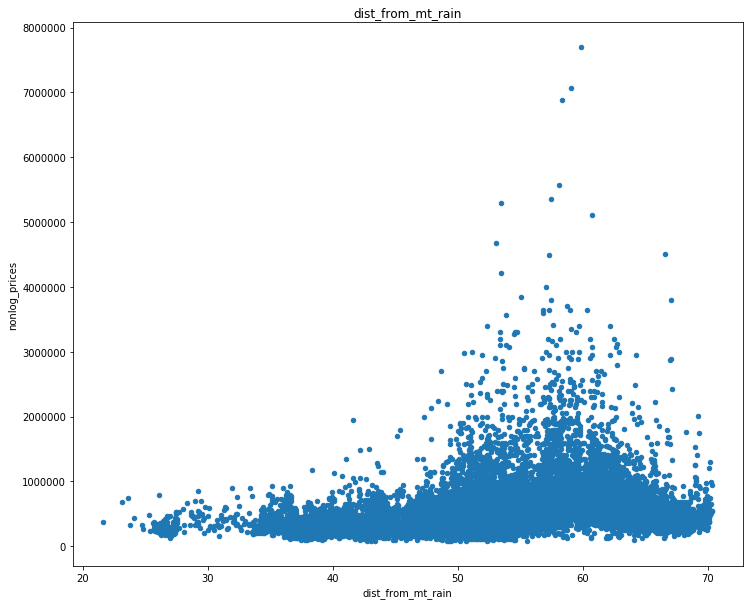

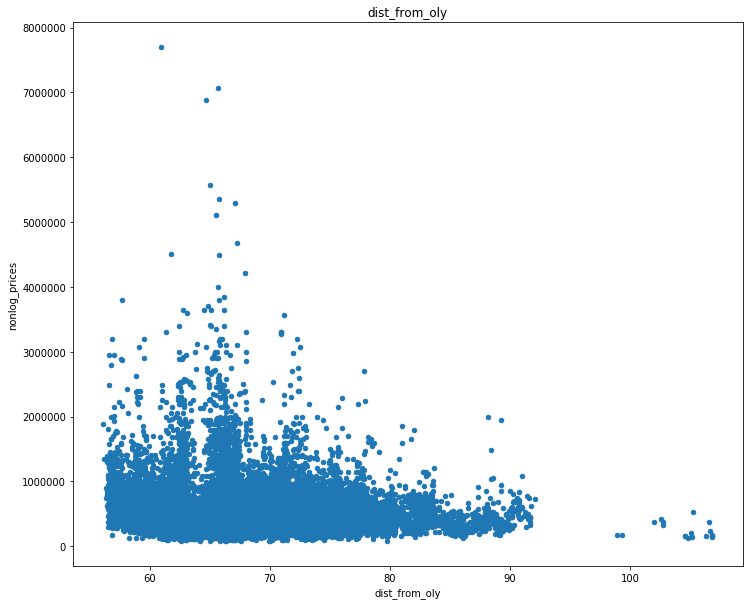

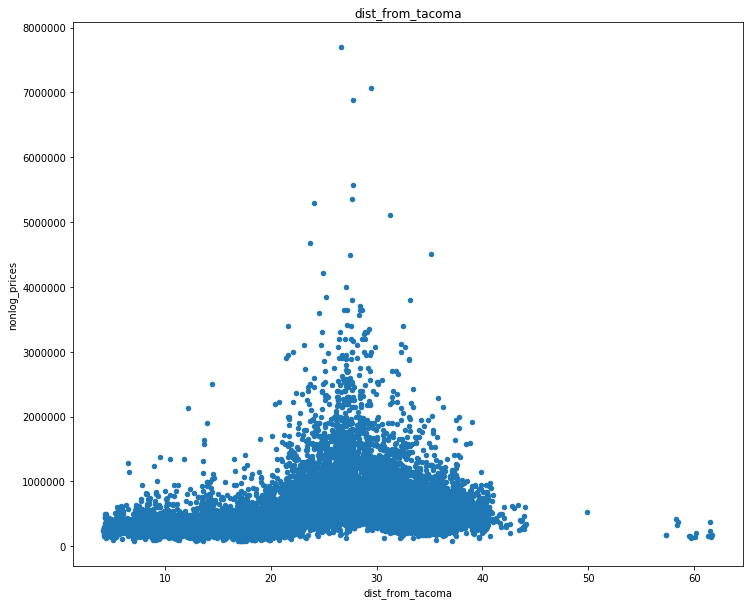

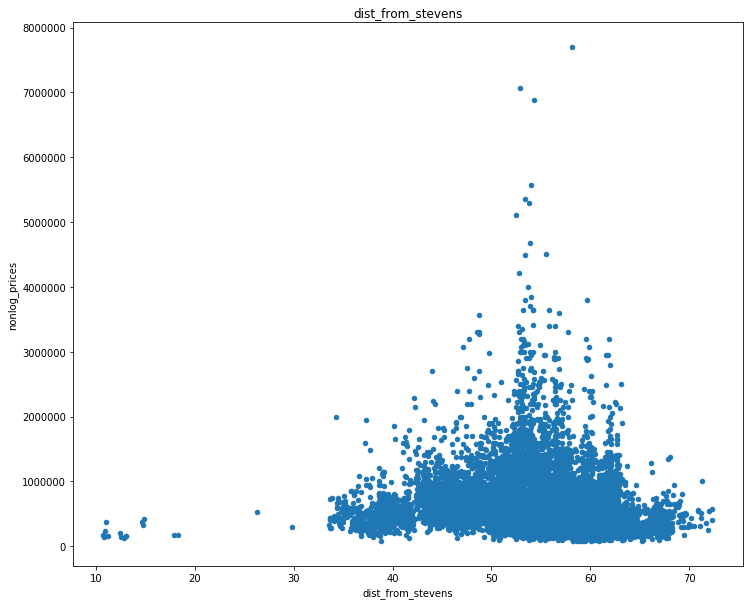

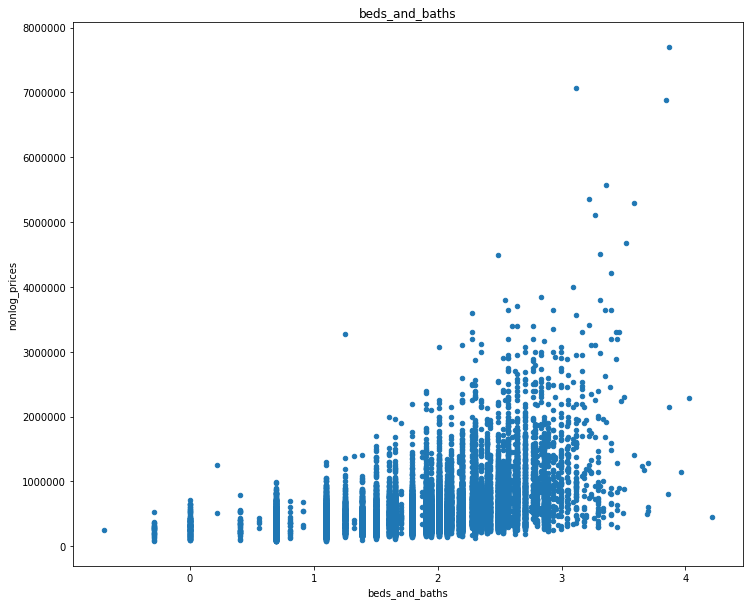

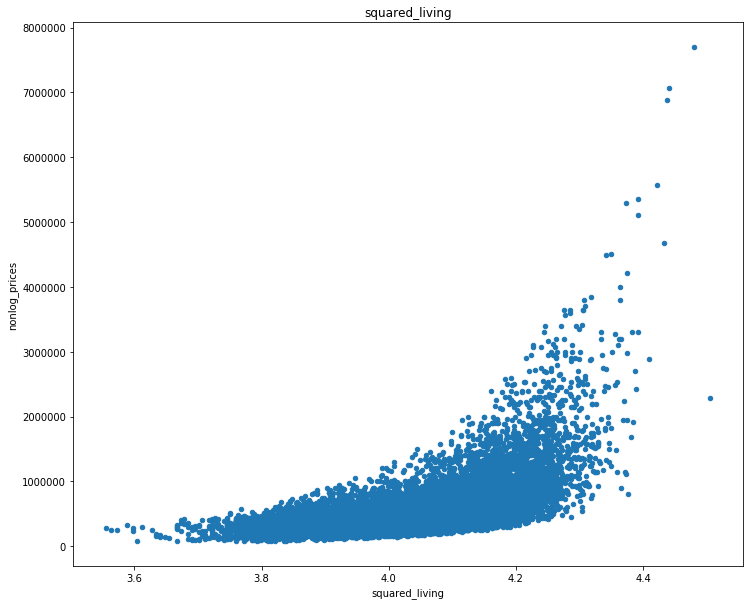

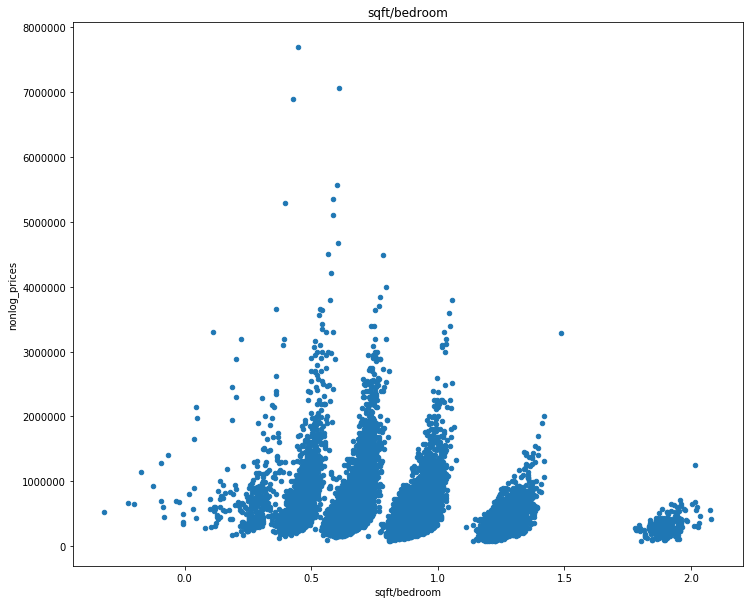

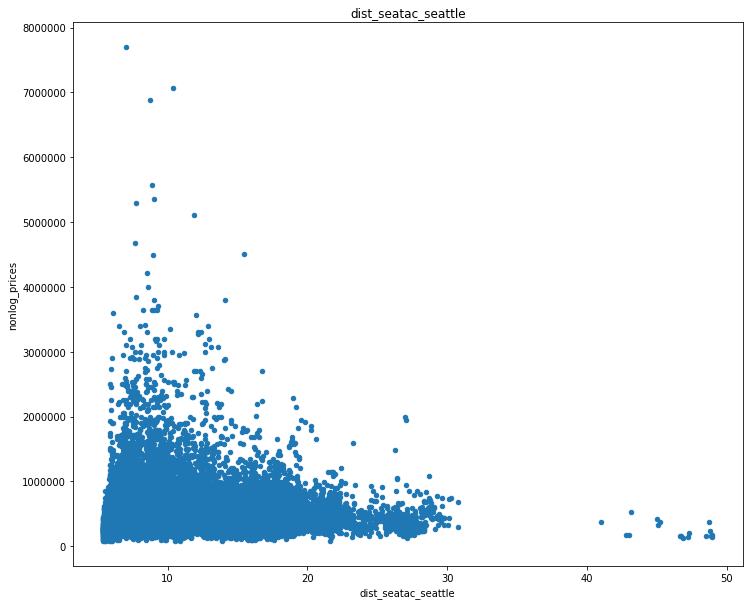

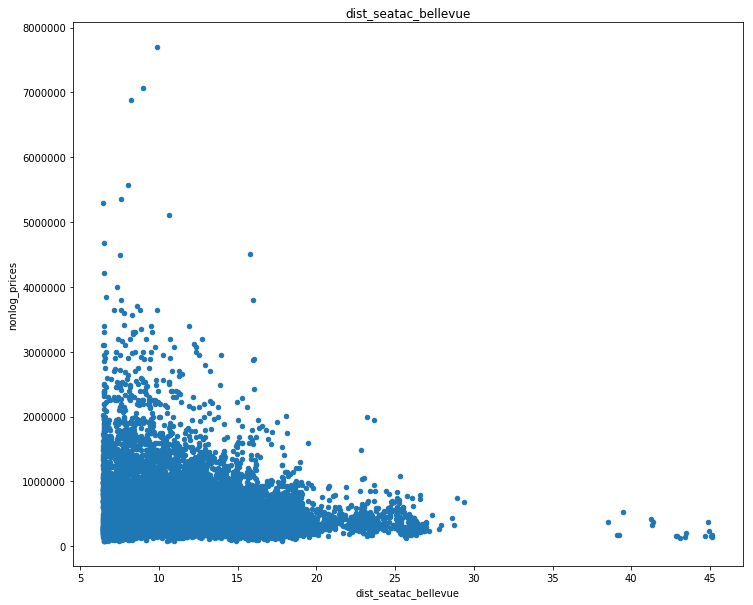

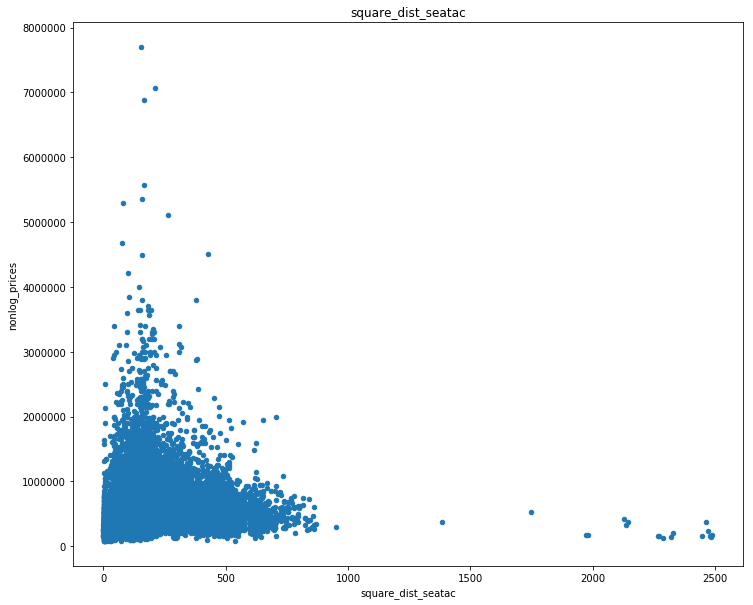

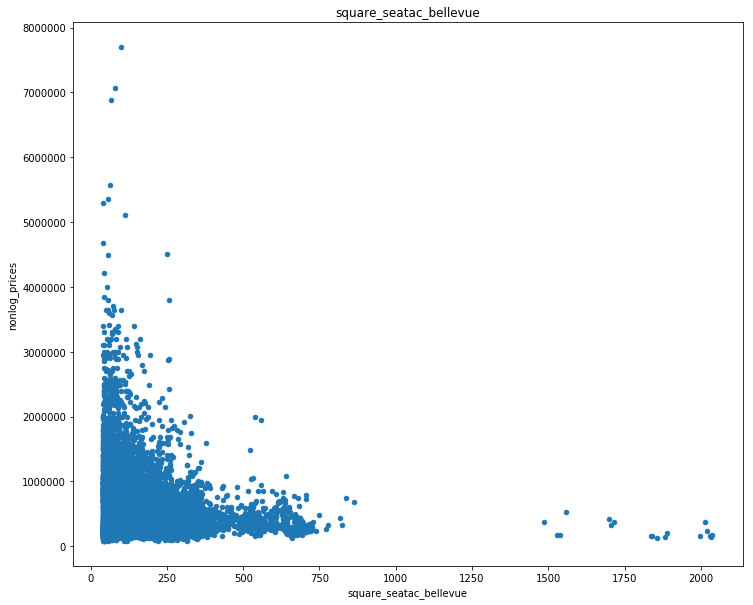

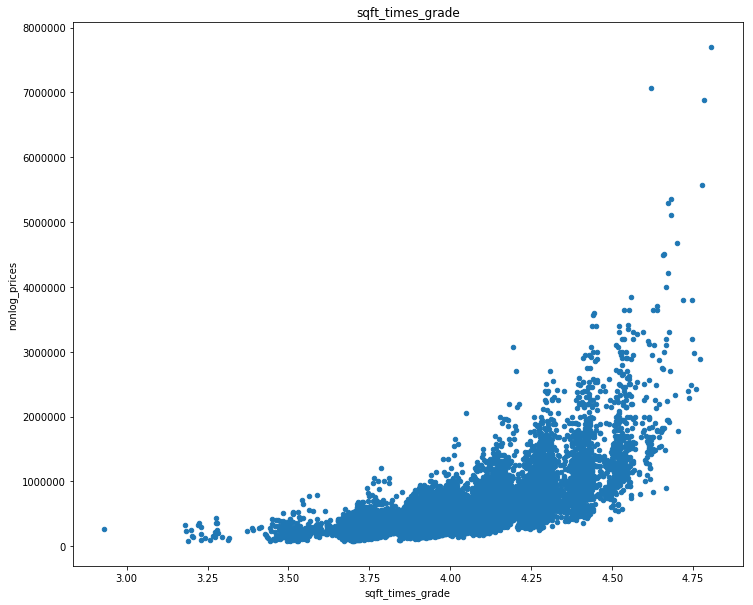

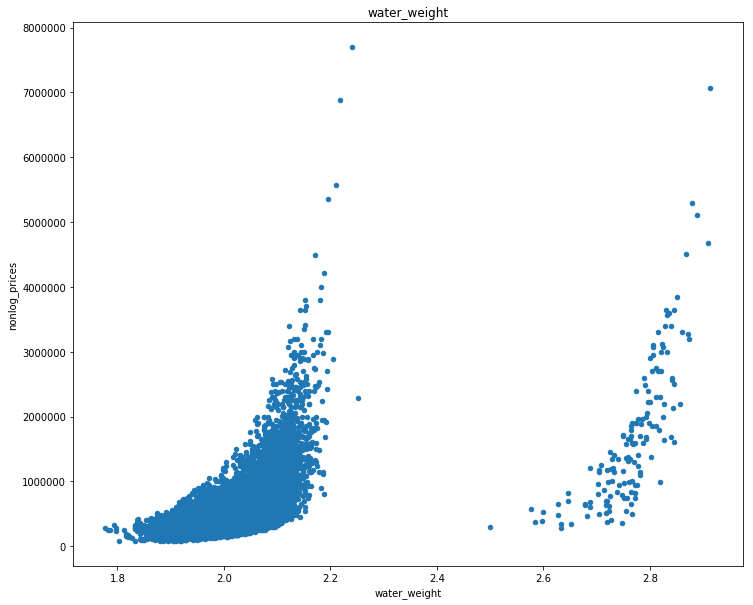

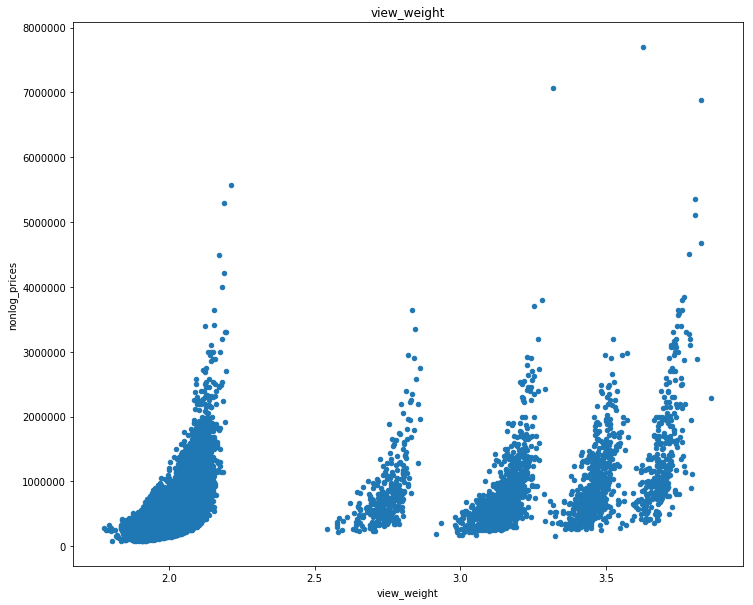

In [42]:
for feature in compiled_data.drop(to_exclude, axis=1).columns:
    compiled_data.plot(x=feature, y='nonlog_prices', kind='scatter', title=f"{feature}", figsize=(12,10));